# Meta-Analysis for Placental mQTLs
I will be using the [MeCS](https://cnsgenomics.com/software/smr/#MeCS) method/software to conduct fixed-effect meta-analysis in (potentially) correlated samples for both marginal and sex-biased effects.

## Formatting `besd` files
I need to remove some duplicates in the summary statistics files:

In [8]:
%%bash 
files=( "$HOME/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all.txt" "$HOME/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction.txt" "$HOME/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all.txt" "$HOME/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction.txt" )
for f in ${files[@]}; do
    awk -F '\t' '!seen[$1,$2]++' $f > "${f%.*}"_dedup.txt &
done
wait

In [1]:
%%bash
# First load environment
source ~/.bashrc

# Marginal
smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt \
    --matrix-eqtl-format \
    --make-besd\
    --out ../data/delahaye_marginal &
smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt\
    --matrix-eqtl-format\
    --make-besd\
    --out ../data/RICHS_marginal &

# Sex interaction
smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt\
    --matrix-eqtl-format \
    --make-besd\
    --out ../data/delahaye_sex_interaction &
smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt\
    --matrix-eqtl-format\
    --make-besd\
    --out ../data/RICHS_sex_interaction 

wait

*******************************************************************
*******************************************************************
*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* The University of Queensland
* MIT License
* The University of Queensland
* MIT License
* MIT License
*******************************************************************
* MIT License
****************

bash: line 22: 41376 Killed                  smr_Linux --eqtl-summary ~/RICHS_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_sex_interaction_dedup.txt --matrix-eqtl-format --make-besd --out ../data/RICHS_sex_interaction
bash: line 24: 41373 Killed                  smr_Linux --eqtl-summary ~/delahaye_QC/matrix_eqtl_data/cis_mQTL_9_methy_PC_all_dedup.txt --matrix-eqtl-format --make-besd --out ../data/delahaye_marginal


These files need to be updated to include coordinates and alleles:

In [9]:
import pandas as pd
from IPython.display import display
mqtl_annotation = pd.read_csv("../../450k_annotation.csv")
delahaye_pos = pd.read_csv('../../delahaye_QC/matrix_eqtl_data/snp_pos.txt', sep='\s+')
snp_data_delahaye = pd.read_csv(
    "../../delahaye_QC/placenta_regulatory_landscape/RootStudyConsentSet_phs001717.PlacentalRegulation.v1.p1.c1.HMB-IRB-PUB-COL-MDS/genotype_qc/all_imputed_r2_30_rsid.afreq",
    dtype={'#CHROM': str},
    sep="\t"
).merge(delahaye_pos, left_on='ID', right_on='SNP')
richs_pos = pd.read_csv('../../RICHS_QC/matrix_eqtl_data/snp_pos.txt', sep='\s+')
snp_data_richs = pd.read_csv(
    "../../RICHS_genotyping/phg001102.v1.RICHS.genotype-calls-matrixfmt.MEGA_Consortium.c1.GRU/all_imputed_r2_30_rsid.afreq",
    dtype={'#CHROM': str},
    sep="\t"
).merge(richs_pos,left_on='ID', right_on='SNP')

# Show data headers
display(mqtl_annotation.head())
display(snp_data_delahaye.head())

# generate esi formats: chr# snp cM/0 BP. REF ALT FREQ
esi_delahaye = pd.read_csv("../data/delahaye_marginal.esi", sep='\s+', header=None)
esi_richs = pd.read_csv("../data/RICHS_marginal.esi", sep='\s+', header=None)

esi_delahaye.merge(snp_data_delahaye, left_on=1, right_on = 'ID').to_csv("../data/delahaye_esi_update.esi", index=False, header=None,sep='\t', columns=['#CHROM','ID',2,'POS','REF','ALT','ALT_FREQS'])
esi_richs.merge(snp_data_richs, left_on=1, right_on = 'ID').to_csv("../data/richs_esi_update.esi", index=False, header=None,sep='\t', columns=['#CHROM','ID',2,'POS','REF','ALT','ALT_FREQS'])

/home/wcasazza/miniconda3/envs/big_data/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,...,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00050873,chrY,9363356,-,cg00050873,32735311,31717405.0,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,...,TSPY4;FAM197Y2,NM_001164471;NR_001553,Body;TSS1500,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
1,cg00212031,chrY,21239348,-,cg00212031,29674443,38703326.0,CCCAATTAACCACAAAAACTAAACAAATTATACAATCAAAAAAACA...,CCCAATTAACCGCAAAAACTAAACAAATTATACGATCGAAAAAACG...,I,...,TTTY14,NR_001543,TSS200,NaN,NaN,NaN,Y:19697854-19699393,NaN,NaN,NaN
2,cg00213748,chrY,8148233,-,cg00213748,30703409,36767301.0,TTTTAACACCTAACACCATTTTAACAATAAAAATTCTACAAAAAAA...,TTTTAACGCCTAACACCGTTTTAACGATAAAAATTCTACAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:8207555-8208234,NaN,NaN,NaN
3,cg00214611,chrY,15815688,-,cg00214611,69792329,46723459.0,CTAACTTCCAAACCACACTTTATATACTAAACTACAATATAACACA...,CTAACTTCCGAACCGCGCTTTATATACTAAACTACAATATAACGCG...,I,...,TMSB4Y;TMSB4Y,NM_004202;NM_004202,1stExon;5'UTR,NaN,NaN,NaN,Y:14324883-14325218,Y:15815422-15815706,Promoter_Associated_Cell_type_specific,NaN
4,cg00455876,chrY,9385539,-,cg00455876,27653438,69732350.0,AACTCTAAACTACCCAACACAAACTCCAAAAACTTCTCAAAAAAAA...,AACTCTAAACTACCCGACACAAACTCCAAAAACTTCTCGAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:9993394-9995882,NaN,NaN,NaN


,#CHROM,ID,REF,ALT,ALT_FREQS,OBS_CT,SNP,CHR,POS
0,1,rs192898053,T,C,0.000949,554,rs192898053,chr1,77470
1,1,rs533785935,C,T,0.000968,554,rs533785935,chr1,87838
2,1,rs549482313,C,T,0.000968,554,rs549482313,chr1,87839
3,1,rs201475892,C,T,0.019505,554,rs201475892,chr1,534247
4,1,rs564392300,G,A,0.000731,554,rs564392300,chr1,724567


In [25]:
# generate epi formats: chr# probe cM/0 BP another_id strand
epi_delahaye = pd.read_csv("../data/delahaye_marginal.epi", sep='\s+', header=None)
epi_richs = pd.read_csv("../data/RICHS_marginal.epi", sep='\s+', header=None)
mqtl_annotation.chr = mqtl_annotation.chr.str.replace("chr","")
display(epi_delahaye.head())
display(mqtl_annotation)
epi_delahaye.merge(mqtl_annotation, left_on=1, right_on = 'Name').to_csv("../data/delahaye_epi_update.epi", index=False, header=None,sep='\t', columns=['chr','Name',2,'pos','Name','strand'])
epi_richs.merge(mqtl_annotation, left_on=1, right_on = 'Name').to_csv("../data/richs_epi_update.epi", index=False, header=None,sep='\t', columns=['chr','Name',2,'pos','Name','strand'])

,0,1,2,3,4,5
0,NaN,cg19311470,0,NaN,NaN,NaN
1,NaN,cg14859874,0,NaN,NaN,NaN
2,NaN,cg23367851,0,NaN,NaN,NaN
3,NaN,cg09084244,0,NaN,NaN,NaN
4,NaN,cg01081438,0,NaN,NaN,NaN


,Unnamed: 0,chr,pos,strand,Name,AddressA,AddressB,ProbeSeqA,ProbeSeqB,Type,...,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
0,cg00050873,Y,9363356,-,cg00050873,32735311,31717405.0,ACAAAAAAACAACACACAACTATAATAATTTTTAAAATAAATAAAC...,ACGAAAAAACAACGCACAACTATAATAATTTTTAAAATAAATAAAC...,I,...,TSPY4;FAM197Y2,NM_001164471;NR_001553,Body;TSS1500,NaN,NaN,NaN,Y:9973136-9976273,NaN,NaN,NaN
1,cg00212031,Y,21239348,-,cg00212031,29674443,38703326.0,CCCAATTAACCACAAAAACTAAACAAATTATACAATCAAAAAAACA...,CCCAATTAACCGCAAAAACTAAACAAATTATACGATCGAAAAAACG...,I,...,TTTY14,NR_001543,TSS200,NaN,NaN,NaN,Y:19697854-19699393,NaN,NaN,NaN
2,cg00213748,Y,8148233,-,cg00213748,30703409,36767301.0,TTTTAACACCTAACACCATTTTAACAATAAAAATTCTACAAAAAAA...,TTTTAACGCCTAACACCGTTTTAACGATAAAAATTCTACAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:8207555-8208234,NaN,NaN,NaN
3,cg00214611,Y,15815688,-,cg00214611,69792329,46723459.0,CTAACTTCCAAACCACACTTTATATACTAAACTACAATATAACACA...,CTAACTTCCGAACCGCGCTTTATATACTAAACTACAATATAACGCG...,I,...,TMSB4Y;TMSB4Y,NM_004202;NM_004202,1stExon;5'UTR,NaN,NaN,NaN,Y:14324883-14325218,Y:15815422-15815706,Promoter_Associated_Cell_type_specific,NaN
4,cg00455876,Y,9385539,-,cg00455876,27653438,69732350.0,AACTCTAAACTACCCAACACAAACTCCAAAAACTTCTCAAAAAAAA...,AACTCTAAACTACCCGACACAAACTCCAAAAACTTCTCGAAAAAAA...,I,...,NaN,NaN,NaN,NaN,NaN,NaN,Y:9993394-9995882,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485507,ch.22.909671F,22,46114168,+,ch.22.909671F,47797398,NaN,GCACCACTTACACACAAAAACATTTCTTTTCAATAAATTTTTAATT...,NaN,II,...,ATXN10;ATXN10,NM_001167621;NM_013236,Body;Body,NaN,NaN,True,NaN,NaN,NaN,NaN
485508,ch.22.46830341F,22,48451677,+,ch.22.46830341F,29618504,NaN,GAAAAAATAAAAACCATTCTCTAAACAAAATACCTTCTACATATAA...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485509,ch.22.1008279F,22,48731367,+,ch.22.1008279F,49664383,NaN,CCCCTACAATCTTCCTAAACCTAAAACTAAATCTATATTAAATAAA...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485510,ch.22.47579720R,22,49193714,+,ch.22.47579720R,53733426,NaN,CCTCTCTCCAACTTCTAAAATTTACTAATAATCTCTAAAACCCCTT...,NaN,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
%%bash
# First load environment
source ~/.bashrc

smr_Linux --beqtl-summary ../data/RICHS_sex_interaction --update-esi ../data/richs_esi_update.esi
smr_Linux --beqtl-summary ../data/RICHS_sex_interaction --update-epi ../data/richs_epi_update.epi
smr_Linux --beqtl-summary ../data/RICHS_marginal --update-esi ../data/richs_esi_update.esi
smr_Linux --beqtl-summary ../data/RICHS_marginal --update-epi ../data/richs_epi_update.epi

smr_Linux --beqtl-summary ../data/delahaye_sex_interaction --update-esi ../data/delahaye_esi_update.esi
smr_Linux --beqtl-summary ../data/delahaye_sex_interaction --update-epi ../data/delahaye_epi_update.epi
smr_Linux --beqtl-summary ../data/delahaye_marginal --update-esi ../data/delahaye_esi_update.esi
smr_Linux --beqtl-summary ../data/delahaye_marginal --update-epi ../data/delahaye_epi_update.epi


*******************************************************************
* Summary-data-based Mendelian Randomization (SMR)
* version 1.03
* (C) 2015 Futao Zhang, Zhihong Zhu and Jian Yang
* The University of Queensland
* MIT License
*******************************************************************
Analysis started: 23:5:27,Tue Apr 6,2021

Options:
--beqtl-summary ../data/RICHS_sex_interaction
--update-esi ../data/richs_esi_update.esi

Reading eQTL SNP information from [../data/RICHS_sex_interaction.esi].
5483835 SNPs to be included from [../data/RICHS_sex_interaction.esi].

Generating the .esi file...
5483835 SNPs have been saved in the file ../data/RICHS_sex_interaction.bak.esi.

Generating the .esi file...
5483835 SNPs have been saved in the file ../data/RICHS_sex_interaction.esi.
5483847 of 5483835 SNPs are updated.

Analysis completed: 23:6:14,Tue Apr 6,2021
Computational time: 0:0:47
*******************************************************************
* Summary-data-based Mendelian R

## Running Meta analysis

In [ ]:
%%bash
# First load environment
source ~/.bashrc
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_sex_interaction" > "../data/besd.list"
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/RICHS_sex_interaction" >> "../data/besd.list"
smr_Linux --besd-flist "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/besd.list"\
    --mecs\
    --thread-num 16 \
    --out "../data/delahaye_richs_sex_interaction_mecs"

echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/delahaye_marginal" > "../data/besd.list"
echo "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/RICHS_marginal" >> "../data/besd.list"
smr_Linux --besd-flist "/scratch/st-dennisjk-1/wcasazza/sex_specific_mQTL/data/besd.list"\
    --mecs\
    --thread-num 16\
    --out "../data/delahaye_richs_marginal_mecs"

## Investigating output

In [3]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import datatable as DT

from statsmodels.stats.multitest import multipletests

In [20]:
marginal = dd.read_csv("../data/delahaye_richs_marginal_mecs.txt", sep='\s+')
sex_interaction = dd.read_csv("../data/delahaye_richs_sex_interaction_mecs.txt", sep='\s+')

In [21]:
marginal_fdr = multipletests(marginal.p,method = 'fdr_bh')
sex_interaction_fdr = multipletests(sex_interaction.p,method = 'fdr_bh')

marginal.set_index('p')
sex_interaction.set_index('p')

,SNP,Chr,BP,A1,A2,Freq,Probe,Probe_Chr,Probe_bp,Gene,Orientation,b,SE
npartitions=601,,,,,,,,,,,,,
0.000000e+00,object,int64,int64,object,object,float64,object,int64,int64,object,object,float64,float64
1.777920e-135,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.999930e-01,...,...,...,...,...,...,...,...,...,...,...,...,...
1.000000e+00,...,...,...,...,...,...,...,...,...,...,...,...,...


In [22]:
marginal_sig = marginal[marginal.p < marginal_fdr[3]].compute()
sex_interaction_sig = sex_interaction[sex_interaction.p < sex_interaction_fdr[3]].compute()

marginal_sig['FDR'] = pd.Series(marginal_fdr[1][marginal_fdr[0]])
sex_interaction_sig['FDR'] = pd.Series(sex_interaction_fdr[1][sex_interaction_fdr[0]])

marginal_sig.to_csv("../data/delahaye_richs_marginal_mecs_sig.txt", sep='\t', index=False)
sex_interaction_sig.to_csv("../data/delahaye_richs_sex_interaction_mecs_sig.txt", sep='\t', index=False)

array([[<AxesSubplot:title={'center':'p'}>]], dtype=object)

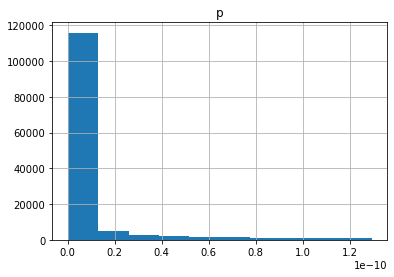

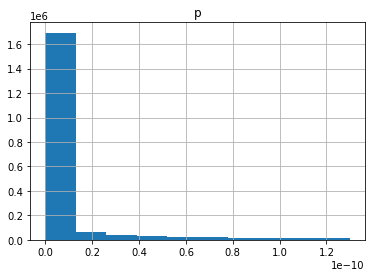

In [23]:
if not "marginal_sig" in vars():
    marginal_sig = pd.read_csv("../data/delahaye_richs_marginal_mecs_sig.txt", sep = '\t')

if not "sex_interaction_sig" in vars():
    sex_interaction_sig = pd.read_csv("../data/delahaye_richs_sex_interaction_mecs_sig.txt", sep = '\t')
sex_interaction_sig.hist('p')
marginal_sig.hist('p')

In [24]:
sex_interaction_sig.drop_duplicates(subset="Probe")

,SNP,Chr,BP,A1,A2,Freq,Probe,Probe_Chr,Probe_bp,Gene,Orientation,b,SE,p,FDR
113,rs185434174,1,751574,G,C,0.002390,cg01014490,1,714177,cg01014490,-,0.601467,0.085865,2.473170e-12,1.736398e-04
6348,rs184560294,1,808643,G,A,0.003254,cg18147296,1,812539,cg18147296,+,-8.371210,1.264780,3.622960e-11,1.454885e-04
30520,rs185216126,1,776078,T,C,0.004184,cg11851804,1,848379,cg11851804,-,-3.892790,0.596152,6.583320e-11,3.291545e-04
38516,rs114199821,1,862515,C,T,0.006693,cg16347928,1,854838,cg16347928,+,-0.317650,0.047578,2.449490e-11,2.419640e-02
65466,rs544548333,1,933407,C,G,0.004413,cg14324200,1,861317,cg14324200,+,0.113856,0.017017,2.220060e-11,3.146138e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43755,rs187124619,23,154019005,G,T,0.001811,cg26668105,23,154059788,cg26668105,-,131.201000,16.626100,2.990590e-15,4.426283e-06
60966,X:154523305:G:C,23,154523305,G,C,0.007735,cg00547789,23,154493750,cg00547789,+,0.321164,0.029396,8.714390e-28,2.571588e-02
61333,X:154523305:G:C,23,154523305,G,C,0.007735,cg10512285,23,154493754,cg10512285,+,0.272093,0.021983,3.475040e-35,2.185895e-20
67697,X:154799075:G:C,23,154799075,G,C,0.002244,cg09975171,23,154842841,cg09975171,-,-42.459400,5.975790,1.201230e-12,2.469529e-03


In [25]:
marginal_sig.drop_duplicates(subset="Probe")

,SNP,Chr,BP,A1,A2,Freq,Probe,Probe_Chr,Probe_bp,Gene,Orientation,b,SE,p,FDR
2200,rs140605359,1,768680,C,T,0.005307,cg00168193,1,790667,cg00168193,+,0.379976,0.030361,6.164510e-36,1.818554e-02
4050,rs12562034,1,768448,G,A,0.125459,cg16619049,1,805541,cg16619049,+,-0.101229,0.013100,1.096670e-14,4.686470e-02
4740,rs12562034,1,768448,G,A,0.125459,cg23100540,1,805554,cg23100540,+,-0.059556,0.008609,4.580570e-12,1.955001e-16
13113,rs9697378,1,832060,G,A,0.649665,cg04195702,1,838486,cg04195702,-,-0.021885,0.003159,4.255060e-12,3.425395e-05
14895,rs4475692,1,825069,G,C,0.657431,cg08128007,1,839435,cg08128007,+,0.041233,0.006181,2.547820e-11,1.264099e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262685,rs146635866,23,154003019,C,T,0.003608,cg00213853,23,154034091,cg00213853,+,-0.145880,0.022508,9.104790e-11,3.859878e-02
265111,rs5987030,23,154030418,G,C,0.014065,cg26668105,23,154059788,cg26668105,-,0.213553,0.019323,2.147570e-28,2.703723e-04
269990,rs147176029,23,154185209,C,T,0.001805,cg21397157,23,154254928,cg21397157,-,-0.261492,0.030980,3.157740e-17,4.313436e-02
288911,rs2305517,23,154774663,G,A,0.489583,cg09975171,23,154842841,cg09975171,-,-0.041822,0.005217,1.093730e-15,1.365072e-21
